## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [16]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (16,10)

## Loading MNIST dataset

In [3]:
MNIST = pd.read_csv("train.csv")
MNIST.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x = MNIST.drop(['label'], axis=1)
y = MNIST['label']


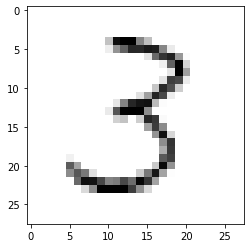

In [5]:
rand_digit = x.values[34230]
rand_digit_img = rand_digit.reshape(28,28)

plt.imshow(rand_digit_img, cmap= matplotlib.cm.binary, interpolation= 'nearest')

In [6]:
y[34230]

3

# Training the first model

### First we will create the classifier to classify 3

In [7]:
y_3 = (y == 3)
y_3[:5]

0    False
1    False
2    False
3    False
4    False
Name: label, dtype: bool

In [8]:
y[:5]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

### Stochastic Gradient Descent Classifier

In [9]:
from sklearn.linear_model import SGDClassifier
SGDC = SGDClassifier(random_state= 42, loss= 'log')
SGDC.fit(x, y_3)

SGDClassifier(loss='log', random_state=42)

### to make some prediction

In [10]:
from sklearn.model_selection import cross_val_predict
y_3_predict = cross_val_predict(SGDC, x, y_3, cv= 3)

### Results and Accuracy scores

In [11]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score

In [12]:
conf_matrix = confusion_matrix(y_3, y_3_predict)
conf_matrix

array([[36551,  1098],
       [  624,  3727]])

In [13]:
print("Precision Score = ",precision_score(y_3, y_3_predict)*100)
print("Recall Score = ",recall_score(y_3, y_3_predict)*100)
print("f1 Score = ",f1_score(y_3, y_3_predict)*100)

Precision Score =  77.24352331606218
Recall Score =  85.6584693173983
f1 Score =  81.23365300784656


### Errors and Scores

In [14]:
y_pred = cross_val_predict(SGDC, x, y, cv= 3)

conf_mx = confusion_matrix(y, y_pred)
conf_mx

array([[3940,    0,   21,   14,    6,   43,   38,    3,   51,   16],
       [   1, 4485,   22,   26,    8,   18,    6,    6,  104,    8],
       [  30,   64, 3490,  116,   46,   42,   65,   80,  206,   38],
       [   8,   14,  159, 3668,    9,  193,   17,   35,  158,   90],
       [   9,   19,   38,   24, 3537,   28,   34,   18,  122,  243],
       [  43,   20,   43,  135,   49, 3086,   66,   21,  229,  103],
       [  35,    6,   68,   19,   31,  112, 3810,    1,   53,    2],
       [  15,   15,   40,   50,   46,   22,    3, 3895,   53,  262],
       [  21,   61,   46,  137,   26,  167,   39,   23, 3418,  125],
       [  14,   14,   16,   69,  146,   58,    0,  151,  111, 3609]])

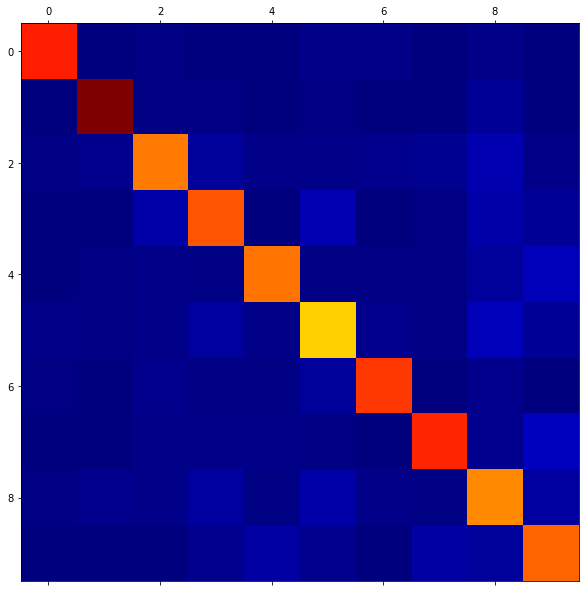

In [45]:
plt.matshow(conf_mx, cmap= plt.cm.jet)
plt.show()

### Let's try error rates instead of absolute errors:

In [29]:
rows_sum = conf_mx.sum(axis =1, keepdims= True)
norm_conf_mx = conf_mx / rows_sum
norm_conf_mx
np.fill_diagonal(norm_conf_mx, 0) # filling diagnal as 0
norm_conf_mx

array([[0.        , 0.        , 0.00508228, 0.00338819, 0.00145208,
        0.01040658, 0.00919652, 0.00072604, 0.01234269, 0.00387222],
       [0.00021349, 0.        , 0.00469684, 0.00555081, 0.00170794,
        0.00384287, 0.00128096, 0.00128096, 0.02220325, 0.00170794],
       [0.00718219, 0.015322  , 0.        , 0.02777113, 0.01101269,
        0.01005506, 0.01556141, 0.0191525 , 0.04931769, 0.00909744],
       [0.00183866, 0.00321765, 0.03654332, 0.        , 0.00206849,
        0.04435762, 0.00390715, 0.00804413, 0.03631349, 0.0206849 ],
       [0.00221022, 0.00466601, 0.00933202, 0.00589391, 0.        ,
        0.00687623, 0.00834971, 0.00442043, 0.02996071, 0.05967583],
       [0.0113307 , 0.00527009, 0.0113307 , 0.03557312, 0.01291173,
        0.        , 0.0173913 , 0.0055336 , 0.06034256, 0.02714097],
       [0.00846024, 0.00145033, 0.01643703, 0.0045927 , 0.00749335,
        0.02707276, 0.        , 0.00024172, 0.01281122, 0.00048344],
       [0.00340832, 0.00340832, 0.0090888

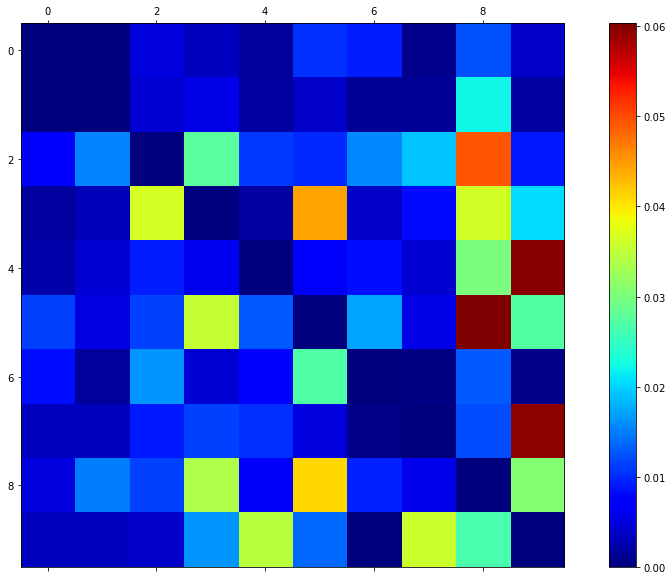

In [77]:
figure = plt.figure()
axes = figure.add_subplot(111)

error_plt = axes.matshow(norm_conf_mx,cmap = plt.cm.jet, interpolation ='nearest')
figure.colorbar(error_plt)

<h3>Note:</h3> We can see that, lot of <b>7, 5, 4</b> and <b>2</b> were missclassified as <b>9, 8, 9</b> and <b>8</b> respectivily

#### Defining the plot_digits function to plot the image of digits

In [50]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances.values]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [69]:
class_2, class_4, class_5, class_7, class_8, class_9 = 2,4,5,7,8,9

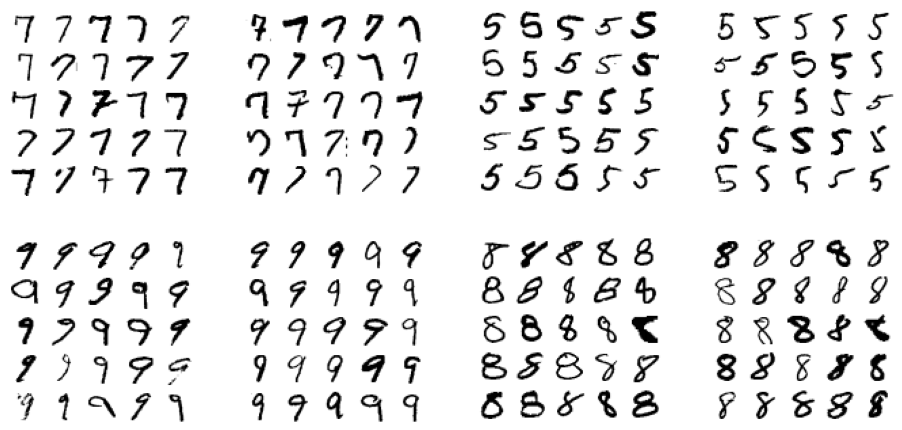

In [65]:
class_77 = x[(y == class_7) & (y_pred == class_7)]
class_79 = x[(y == class_7) & (y_pred == class_9)]
class_97 = x[(y == class_9) & (y_pred == class_7)]
class_99 = x[(y == class_9) & (y_pred == class_9)]

class_55 = x[(y == class_5) & (y_pred == class_5)]
class_58 = x[(y == class_5) & (y_pred == class_8)]
class_85 = x[(y == class_8) & (y_pred == class_5)]
class_88 = x[(y == class_8) & (y_pred == class_8)]

class_44 = x[(y == class_4) & (y_pred == class_4)]
class_49 = x[(y == class_4) & (y_pred == class_9)]
class_94 = x[(y == class_9) & (y_pred == class_4)]
class_99 = x[(y == class_9) & (y_pred == class_9)]

class_22 = x[(y == class_2) & (y_pred == class_2)]
class_29 = x[(y == class_2) & (y_pred == class_9)]
class_92 = x[(y == class_9) & (y_pred == class_2)]
class_99 = x[(y == class_9) & (y_pred == class_9)]

plt.figure(figsize= (16,16))

plt.subplot(441); plot_digits(class_77.iloc[:25], images_per_row = 5)
plt.subplot(442); plot_digits(class_79.iloc[:25], images_per_row = 5)

plt.subplot(443); plot_digits(class_55.iloc[:25], images_per_row = 5)
plt.subplot(444); plot_digits(class_58.iloc[:25], images_per_row = 5)


plt.subplot(445); plot_digits(class_97.iloc[:25], images_per_row = 5)
plt.subplot(446); plot_digits(class_99.iloc[:25], images_per_row = 5)

plt.subplot(447); plot_digits(class_85.iloc[:25], images_per_row = 5)
plt.subplot(448); plot_digits(class_88.iloc[:25], images_per_row = 5)

<h3>Note:</h3> In the above image left one is classified as <b>7</b> and right one as classified as <b>9</b>, similarly image left one is classified as <b>5</b> and right one as classified as <b>8</b>

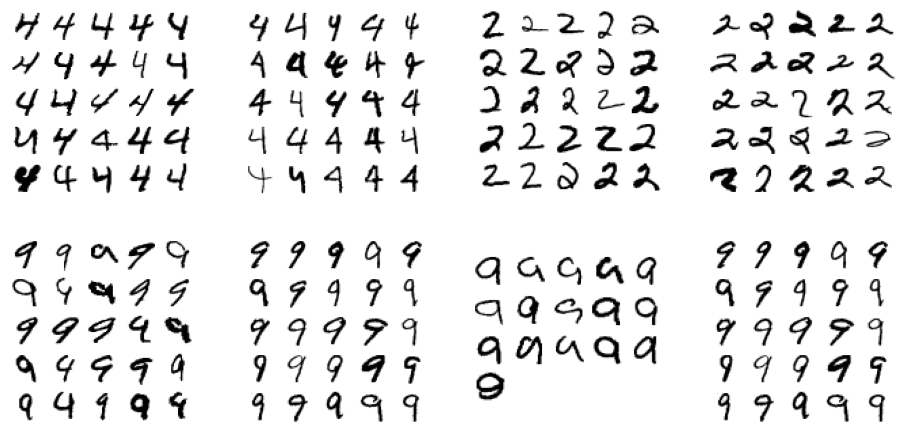

In [68]:
plt.figure(figsize= (16,16))

plt.subplot(441); plot_digits(class_44.iloc[:25], images_per_row = 5)
plt.subplot(442); plot_digits(class_49.iloc[:25], images_per_row = 5)

plt.subplot(443); plot_digits(class_22.iloc[:25], images_per_row = 5)
plt.subplot(444); plot_digits(class_29.iloc[:25], images_per_row = 5)


plt.subplot(445); plot_digits(class_94.iloc[:25], images_per_row = 5)
plt.subplot(446); plot_digits(class_99.iloc[:25], images_per_row = 5)

plt.subplot(447); plot_digits(class_92.iloc[:25], images_per_row = 5)
plt.subplot(448); plot_digits(class_99.iloc[:25], images_per_row = 5)

<h3>Note:</h3> In the above image left one is classified as <b>4</b> and right one as classified as <b>9</b>, similarly image left one is classified as <b>2</b> and right one as classified as <b>9</b>

In [74]:
conf_matrix = confusion_matrix(y, y_pred)
conf_matrix

print("Precision Score = ",precision_score(y, y_pred, average = 'weighted')*100)
print("Recall Score = ",recall_score(y, y_pred, average = 'weighted')*100)
print("f1 Score = ",f1_score(y, y_pred,average = 'weighted')*100)

Precision Score =  88.16142221351278
Recall Score =  87.94761904761906
f1 Score =  88.00733568227365
